# Strong History

Toma el csv generado por la app Strong (https://www.strong.app/) y grafica los datos de ejercicios de fuerza.

Cada serie la cuantifica mediante el volumen (o 1RM estimado) y se genera una grafica de barras apiladas. De esta forma cada color en una barra representa una serie.

In [1]:
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('dark_background')
plt.rcParams['figure.facecolor']='#111111'
plt.rcParams['axes.facecolor']='#111111'

#Convierte el csv en un dataframe de pandas
def Strong_data(filename='strong.csv'):
    workouts = pd.read_csv(filename,sep=';') #Lee archivo

    workouts.drop(columns = ['Workout Name','RPE','Distance','Distance Unit','Seconds','Notes','Workout Notes','Workout Duration'], inplace=True) #Quita cosas inútiles
    workouts.Date = pd.to_datetime(workouts.Date).dt.date #Pone fechas
    workouts = workouts.loc[workouts.Reps != 0] #Quita cosas con 0 reps
    workouts.loc[workouts.Weight.isnull(),'Weight'] = 0.0 #Convierte nulls a 0
    workouts.loc[workouts['Weight Unit'] == 'lbs','Weight'] *= 2.20462 #Todo en kgs
    workouts.drop(columns = ['Weight Unit'], inplace=True) #Todo en kgs
    workouts.loc[workouts['Weight'] == 0,'Weight'] = 1.0 #Para que cuente reps de cosas sin peso

    workouts['1RM'] = workouts.Weight / (1.0278 - 0.0278 * workouts.Reps) #Agrega 1rm
    workouts['Vol'] = workouts.Weight * workouts.Reps #Agrega vol
    
    return workouts

#Grafica historial de un ejercicio usando la columna col ('Vol' o '1RM')
def history(workouts,exercise,col='Vol',start_date=dt.date(2000,1,1)):
    P = workouts.loc[(workouts['Exercise Name']==exercise)&(workouts['Date']>=start_date),['Date','Set Order',col]]
    P = P.set_index(['Date','Set Order']).unstack()
    P.plot.bar(rot=45,legend=False,title=exercise,stacked=True)

In [2]:
wo = Strong_data()

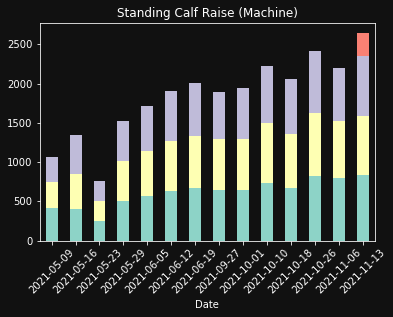

In [3]:
history(wo,'Standing Calf Raise (Machine)',col='1RM')

In [ ]:
exercises = ['Bench Press (Dumbbell)','Chest Dip','Decline Bench Press (Barbell)','Glute Ham Raise','Hip Abductor (Machine)',
             'Hip Thrust (Machine) ','Leg Press','Lu raises','Overhead Press (Dumbbell)','Pull Up', 'Romanian Deadlift (Barbell)',
             'Seated Row (Cable)','Squat (Barbell)','Standing Calf Raise (Machine)']
for ex in exercises:
    history(wo,ex,start_date=dt.date(2021,10,1))